## Step-by-step instructions to interact HEST-1k 

This tutorial will guide you to:

- Read HEST data
- Visualized the spots over a downscaled version of the WSI
- Saving HESTData into Pyramidal Tif and anndata


This tutorial assumes that the user has already downloaded HEST-1k (in its entirety or partially). 

### Read HEST

In [28]:
from hest import read_HESTData
from hest import load_hest

# 1- Read the whole hest dataset
hest_data = load_hest('../hest_data')

# 2- Read a subset of hest
hest_data = load_hest('../hest_data', id_list=['TENX96', 'TENX99'])

# 3- Read an individual sample from disk
st = read_HESTData(
    adata_path='../hest_data/st/TENX96.h5ad', # aligned ST counts
    img='../hest_data/wsis/TENX96.tif', # WSI
    metrics_path='../hest_data/metadata/TENX96.json', # metadata
)

# 4- Access objects

# ST (adata):
adata = st.adata
print('\n* Scanpy adata:')
print(adata)

# WSI (openslide):
wsi = st.wsi
print('\n* OpenSlide wsi:')
print(wsi)



* Scanpy adata:
AnnData object with n_obs × n_vars = 7233 × 541
    obs: 'in_tissue', 'pxl_col_in_fullres', 'pxl_row_in_fullres', 'array_col', 'array_row', 'n_counts', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'mito'
    uns: 'spatial'
    obsm: 'spatial'

* OpenSlide wsi:


## Visualizing the spots over a downscaled version of the WSI

Plotting spatial plots...


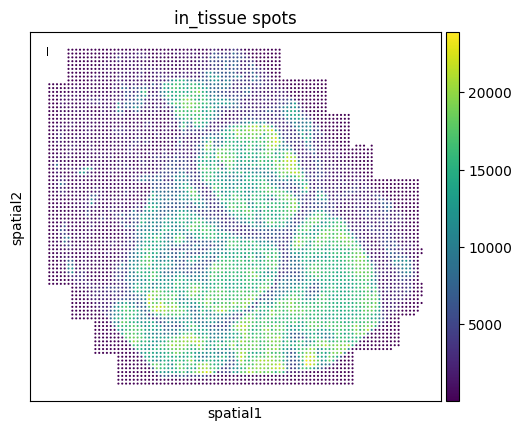

H&E overlay spatial plots saved in .


In [29]:
# visualize the spots over a downscaled version of the full resolution image
save_dir = '.'
st.save_spatial_plot(save_dir)


## Saving to pyramidal tiff and h5
Save `HESTData` object to `.tiff` + expression `.h5ad` and a metadata file.

In [ ]:
# Warning saving a large image to pyramidal tiff (>1GB) can be slow on a hard drive.
st.save(save_dir, pyramidal=True)

## Tissue segmentation

We integrated 2 tissue segmentation methods:

- Image processing-based using Otsu thresholding 
- Deep learning-based using a fine-tuned DeepLabV3 ResNet50


In [31]:
save_dir = '.'

name = 'tissue_seg_otsu'
st.segment_tissue(method='otsu', ) 
st.save_tissue_seg_pkl(save_dir, name)

name = 'tissue_seg_deep'
st.segment_tissue(method='deep') 
st.save_tissue_seg_pkl(save_dir, name)


created temporary directory /tmp/tmpkgd2tz_6
save temp patches...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 342/342 [00:00<00:00, 172203.12it/s]
Using cache found in /home/guillaume/.cache/torch/hub/pytorch_vision_v0.10.0
/home/guillaume/anaconda3/envs/hest/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/guillaume/anaconda3/envs/hest/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
Fetching 1 files: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:09<00:00,  

start inference...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:15<00:00,  2.76it/s]


## Patching

TypeError: get_tissue_mask() takes 1 positional argument but 2 were given

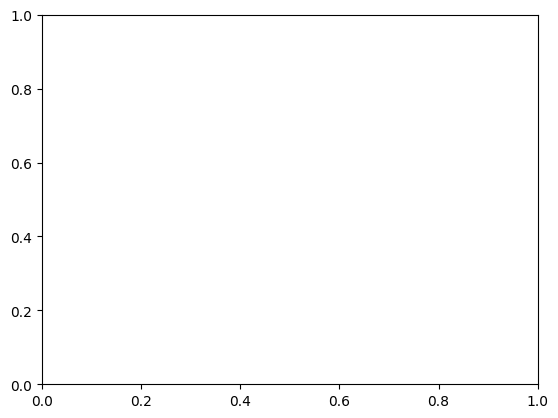

In [34]:
patch_save_dir = '.'

st.dump_patches(
    patch_save_dir,
    'demo',
    target_patch_size=224,
    target_pixel_size=0.5,
#     use_mask=False,
)